# Imports

In [1]:
import pandas as pd
import polars as pl

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.dates as mdates

import calendar
from utilities.schema import contracts_schema

# Read indicators

In [ ]:
modifications = pl.read_ipc("../../data/indicators/2025.arrow")
difs_data = pl.read_ipc("../../data/indicators/2014_2023.arrow")

In [4]:
object_a = pl.read_ipc("../../data/indicators/1011_a.arrow")
object_model = pl.read_ipc("../../data/indicators/1011_model.arrow")

In [22]:
contracts = pl.read_csv("../../data/impic_data/contratos.csv", separator=";", schema_overrides=contracts_schema(),
    columns=['N.º Procedimento (ID BASE)', 'N.º Contrato', 'Data da decisão adjudicação', 
             'Data Celebração', "Contratação Excluída",
             "Ajuste Direto Simplificado", "Tipo de procedimento", "Tipo(s) de contrato"], 
    null_values=["NULL"]) \
    .with_columns(
        pl.col("Data da decisão adjudicação").replace("NULL", None).str.split(" ").list.first().str.replace("'", "").str.to_date("%F"),
        pl.col('Data Celebração').replace("NULL", None).str.split(" ").list.first().str.replace("'", "").str.to_date("%F"),
    ) \
    .filter(pl.col("Contratação Excluída") == False) \
    .unique(subset=['N.º Procedimento (ID BASE)', 'N.º Contrato']) \
    .filter((pl.col("Tipo(s) de contrato")!="Outros") & (pl.col("Tipo(s) de contrato")!="Sociedade"))

In [62]:
pos_tagging = pl.read_csv("../../data/resultados_pos_tagging.csv", schema_overrides={
        "N.º Contrato": pl.Utf8,
        "N.º Procedimento (ID BASE)": pl.Utf8,
    }
    )

In [57]:
pos_tagging.columns

['',
 'Objeto_LIMPO_Final',
 'Objeto',
 'N.º Procedimento (ID BASE)',
 'N.º Contrato',
 'Objeto_len',
 'n_palavras_total',
 'NOUN',
 'ADP',
 'NUM',
 'ADJ',
 'PROPN',
 'X',
 'CCONJ',
 'ADV',
 'DET',
 'VERB',
 'SYM',
 'PRON',
 'AUX',
 'SCONJ',
 'PUNCT',
 'INTJ',
 'PART']

In [63]:
analise = pos_tagging.join(contracts.select(['N.º Procedimento (ID BASE)', 'N.º Contrato', "Tipo de procedimento", "Tipo(s) de contrato"]), how="left", on=['N.º Procedimento (ID BASE)', 'N.º Contrato'], coalesce=True)

In [65]:
analise.filter(pl.col("n_palavras_total")<300)

,Objeto_LIMPO_Final,Objeto,N.º Procedimento (ID BASE),N.º Contrato,Objeto_len,n_palavras_total,NOUN,ADP,NUM,ADJ,PROPN,X,CCONJ,ADV,DET,VERB,SYM,PRON,AUX,SCONJ,PUNCT,INTJ,PART,Tipo de procedimento,Tipo(s) de contrato
i64,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
0,"""aquisição de medicamentos para…","""AQUISIÇÃO DE MEDICAMENTOS PARA…","""6717429""","""10837735""",13,13,5,4,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,"""Ao abrigo de acordo-quadro (ar…","""Aquisição de bens móveis"""
1,"""contrataçao de colaboradores e…","""CONTRATAÇAO DE COLABORADORES, …","""3683846""","""4969149""",19,19,8,7,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,"""Ajuste Direto Regime Geral""","""Aquisição de serviços"""
2,"""aquisição de serviços de 40 se…","""Aquisição de serviços de 40 se…","""6217881""","""9636110""",19,19,7,6,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,"""Ajuste Direto Regime Geral""","""Aquisição de serviços"""
3,"""aquisição de fardamento""","""Aquisição de fardamento""","""4171632""","""6037861""",3,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""Consulta Prévia""","""Aquisição de bens móveis"""
4,"""aquisição de serviços para a a…","""Aquisição de serviços para a a…","""6544832""","""10053964""",12,12,6,4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,"""Ajuste Direto Regime Geral""","""Aquisição de serviços"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
937855,"""«aquisição de serviços de viag…","""«Aquisição de serviços de viag…","""5932683""","""9321406""",26,26,10,9,0,2,0,0,3,0,0,1,0,1,0,0,0,0,0,"""Consulta Prévia""","""Aquisição de serviços"""
937856,"""aquisição de material hidráuli…","""Aquisição de Material Hidráuli…","""6097297""","""9496388""",8,8,3,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,"""Ao abrigo de acordo-quadro (ar…","""Aquisição de bens móveis"""
937857,"""aquisição de 1 unidade do reag…","""Aquisição de 1 unidade do reag…","""5829165""","""10155339""",9,9,4,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"""Ajuste Direto Regime Geral""","""Aquisição de bens móveis"""


In [51]:
analise2 = analise.filter(pl.col("n_palavras_total")<300)

In [61]:
analise

,Objeto_LIMPO_Final,Objeto,N.º Procedimento (ID BASE),N.º Contrato,Objeto_len,n_palavras_total,NOUN,ADP,NUM,ADJ,PROPN,X,CCONJ,ADV,DET,VERB,SYM,PRON,AUX,SCONJ,PUNCT,INTJ,PART,Tipo de procedimento,Tipo(s) de contrato
i64,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
0,"""aquisição de medicamentos para…","""AQUISIÇÃO DE MEDICAMENTOS PARA…","""6717429""","""10837735""",13,13,5,4,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,"""Ao abrigo de acordo-quadro (ar…","""Aquisição de bens móveis"""
1,"""contrataçao de colaboradores e…","""CONTRATAÇAO DE COLABORADORES, …","""3683846""","""4969149""",19,19,8,7,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,"""Ajuste Direto Regime Geral""","""Aquisição de serviços"""
2,"""aquisição de serviços de 40 se…","""Aquisição de serviços de 40 se…","""6217881""","""9636110""",19,19,7,6,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,"""Ajuste Direto Regime Geral""","""Aquisição de serviços"""
3,"""aquisição de fardamento""","""Aquisição de fardamento""","""4171632""","""6037861""",3,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"""Consulta Prévia""","""Aquisição de bens móveis"""
4,"""aquisição de serviços para a a…","""Aquisição de serviços para a a…","""6544832""","""10053964""",12,12,6,4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,"""Ajuste Direto Regime Geral""","""Aquisição de serviços"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
937855,"""«aquisição de serviços de viag…","""«Aquisição de serviços de viag…","""5932683""","""9321406""",26,26,10,9,0,2,0,0,3,0,0,1,0,1,0,0,0,0,0,"""Consulta Prévia""","""Aquisição de serviços"""
937856,"""aquisição de material hidráuli…","""Aquisição de Material Hidráuli…","""6097297""","""9496388""",8,8,3,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,"""Ao abrigo de acordo-quadro (ar…","""Aquisição de bens móveis"""
937857,"""aquisição de 1 unidade do reag…","""Aquisição de 1 unidade do reag…","""5829165""","""10155339""",9,9,4,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"""Ajuste Direto Regime Geral""","""Aquisição de bens móveis"""


<Figure size 2000x600 with 0 Axes>

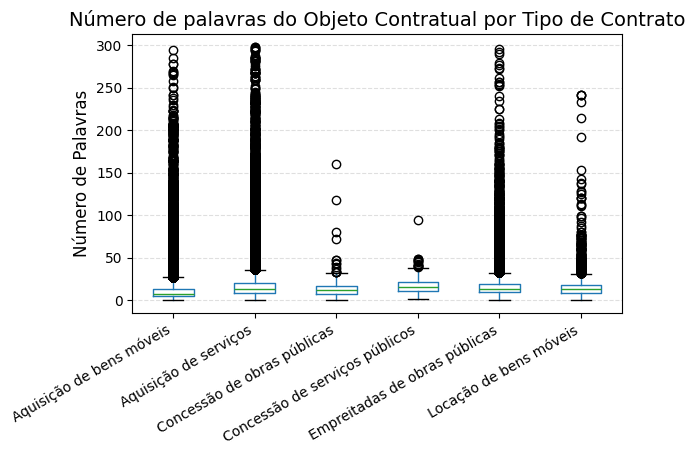

In [68]:
# Seleciona apenas as colunas necessárias e converte para pandas
df_plot = (
    analise2
    .select(["Tipo(s) de contrato", "n_palavras_total"])
    .to_pandas()
)

plt.figure(figsize=(20, 6))

ax = df_plot.boxplot(
    column="n_palavras_total",
    by="Tipo(s) de contrato",
    showfliers=True,
    grid=False
)

# Títulos e rótulos
plt.title("Número de palavras do Objeto Contratual por Tipo de Contrato", fontsize=14)
plt.suptitle("")
plt.xlabel("", fontsize=12)
plt.ylabel("Número de Palavras", fontsize=12)

# Rotaciona e alinha os rótulos do eixo X
plt.xticks(rotation=30, ha="right", fontsize=10)

# Grid horizontal discreto
ax.yaxis.grid(True, linestyle="--", alpha=0.4)
ax.xaxis.grid(False)

# Margens melhores
plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

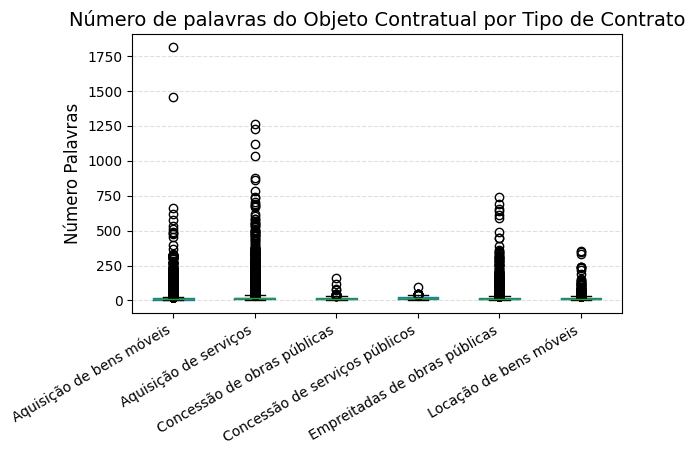

In [47]:
# Seleciona apenas as colunas necessárias e converte para pandas
df_plot = (
    analise
    .select(["Tipo(s) de contrato", "n_palavras_total"])
    .to_pandas()
)

plt.figure(figsize=(20, 6))

ax = df_plot.boxplot(
    column="n_palavras_total",
    by="Tipo(s) de contrato",
    showfliers=True,
    grid=False
)

# Títulos e rótulos
plt.title("Número de palavras do Objeto Contratual por Tipo de Contrato", fontsize=14)
plt.suptitle("")
plt.xlabel("", fontsize=12)
plt.ylabel("Número Palavras", fontsize=12)

# Rotaciona e alinha os rótulos do eixo X
plt.xticks(rotation=30, ha="right", fontsize=10)

# Grid horizontal discreto
ax.yaxis.grid(True, linestyle="--", alpha=0.4)
ax.xaxis.grid(False)

# Margens melhores
plt.tight_layout()
plt.show()


In [36]:
contratos_raw = pl.read_csv("../../data/impic_data/contratos.csv",
                            separator=";",
                            schema_overrides=contracts_schema(),
                            columns=[
                                "N.º Procedimento (ID BASE)", "N.º Contrato", "Data Celebração",
                                "Local de execução das principais prestações objeto do contrato", "Entidade(s) Adjudicatária(s) - NIF", "Entidade(s) Adjudicante(s) - NIF",
                                "Prorrogação de Prazo", "Preço Contratual (€)", "Tipo(s) de contrato", "Tipo de procedimento"
                            ], 
                            null_values=["NULL"]) \
                                .unique(subset=["N.º Contrato", "N.º Procedimento (ID BASE)"]) \
                                .with_columns(
                                pl.col('Data Celebração').replace("NULL", None).str.split(" ").list.first().str.replace("'", "").str.to_date("%F")) \
                                .with_columns(pl.col("Data Celebração").dt.year().alias("ano_celebração")) \
                                .with_columns(pl.col("Data Celebração").dt.month().alias("mes_celebracao"))

In [37]:
object_full = object_model.join(object_a, how="left", on=["N.º Contrato", "N.º Procedimento (ID BASE)"], coalesce=True)
object_full = object_full.join(contratos_raw, how = "left", on=["N.º Contrato", "N.º Procedimento (ID BASE)"], coalesce=True)

In [19]:
object_full.to_pandas().groupby("Tipo(s) de contrato")["flag_1011_anom"].value_counts(normalize=True)

Tipo(s) de contrato             flag_1011_anom
Aquisição de bens móveis        0                 0.999929
                                1                 0.000071
Aquisição de serviços           0                 0.999850
                                1                 0.000150
Concessão de obras públicas     0                 1.000000
Concessão de serviços públicos  0                 1.000000
Empreitadas de obras públicas   0                 0.999782
                                1                 0.000218
Locação de bens móveis          0                 0.999504
                                1                 0.000496
Name: proportion, dtype: float64

In [20]:
object_full.to_pandas().groupby("Tipo(s) de contrato")["flag_1011_dist"].value_counts(normalize=True)

Tipo(s) de contrato             flag_1011_dist
Aquisição de bens móveis        0                 0.999491
                                1                 0.000509
Aquisição de serviços           0                 0.996518
                                1                 0.003482
Concessão de obras públicas     0                 1.000000
Concessão de serviços públicos  0                 1.000000
Empreitadas de obras públicas   0                 0.999855
                                1                 0.000145
Locação de bens móveis          0                 0.999008
                                1                 0.000992
Name: proportion, dtype: float64

In [22]:
object_full.to_pandas().groupby("Tipo(s) de contrato")["flag_1011_model_logistic"].value_counts(normalize=True)

Tipo(s) de contrato             flag_1011_model_logistic
Aquisição de bens móveis        0                           0.982187
                                1                           0.017813
Aquisição de serviços           0                           0.967844
                                1                           0.032156
Concessão de obras públicas     0                           0.688312
                                1                           0.311688
Concessão de serviços públicos  0                           0.975610
                                1                           0.024390
Empreitadas de obras públicas   0                           0.894404
                                1                           0.105596
Locação de bens móveis          0                           0.931086
                                1                           0.068914
Name: proportion, dtype: float64

In [24]:
object_full.to_pandas().groupby("ano_celebração")["flag_1011_anom"].value_counts(normalize=True)

ano_celebração  flag_1011_anom
2018            0                 0.999911
                1                 0.000089
2019            0                 0.999930
                1                 0.000070
2020            0                 0.999932
                1                 0.000068
2021            0                 0.999915
                1                 0.000085
2022            0                 0.999767
                1                 0.000233
2023            0                 0.999866
                1                 0.000134
Name: proportion, dtype: float64

In [25]:
object_full.to_pandas().groupby("ano_celebração")["flag_1011_dist"].value_counts(normalize=True)

ano_celebração  flag_1011_dist
2018            0                 0.997960
                1                 0.002040
2019            0                 0.998395
                1                 0.001605
2020            0                 0.998232
                1                 0.001768
2021            0                 0.998695
                1                 0.001305
2022            0                 0.998513
                1                 0.001487
2023            0                 0.998179
                1                 0.001821
Name: proportion, dtype: float64

In [30]:
object_full.to_pandas().groupby("ano_celebração")["objeto_len"].describe()

,count,mean,std,min,25%,50%,75%,max
ano_celebração,,,,,,,,
2018,22552.0,13.162691,11.782074,1.0,7.0,11.0,17.0,485.0
2019,28664.0,13.296923,12.436465,1.0,6.0,11.0,17.0,352.0
2020,29418.0,13.032769,11.959286,1.0,6.0,10.0,17.0,342.0
2021,35250.0,12.849872,11.671187,1.0,6.0,10.0,17.0,342.0
2022,34290.0,13.904170,15.352818,1.0,7.0,11.0,18.0,1428.0
2023,37341.0,14.155914,11.478060,0.0,7.0,12.0,18.0,504.0


In [38]:
object_full.to_pandas().groupby("mes_celebracao")["objeto_len"].describe()

,count,mean,std,min,25%,50%,75%,max
mes_celebracao,,,,,,,,
1,17704.0,12.468990,12.123806,1.0,6.0,10.0,16.0,288.0
2,16204.0,12.818070,11.180739,1.0,6.0,10.0,17.0,300.0
3,17870.0,12.919586,11.336403,1.0,6.0,10.0,17.0,374.0
4,14621.0,13.374598,12.371842,1.0,6.0,11.0,17.0,303.0
5,15557.0,13.607765,11.983362,1.0,7.0,11.0,17.0,335.0
6,14534.0,13.858332,17.111096,1.0,7.0,11.0,17.0,1428.0
7,15135.0,13.719392,13.659317,1.0,7.0,11.0,17.0,735.0
8,13298.0,13.807565,11.352775,1.0,7.0,11.0,18.0,232.0
9,15476.0,14.311644,12.980383,1.0,7.0,12.0,18.0,504.0


In [ ]:
# localização

# Visualizations for the contractual object indicator

In [5]:
object_a

N.º Procedimento (ID BASE),N.º Contrato,flag_1011_anom,flag_1011_dist,objeto_len
str,str,i32,i32,i64
"""6717429""","""10837735""",0,0,13
"""3683846""","""4969149""",0,0,19
"""6217881""","""9636110""",0,0,19
"""4171632""","""6037861""",0,0,3
"""6544832""","""10053964""",0,0,12
…,…,…,…,…
"""5932683""","""9321406""",0,0,26
"""6097297""","""9496388""",0,0,8
"""5829165""","""10155339""",0,0,9


# Visualizations for the modifications indicator

## 1st Visualization

From all the contracts, which ones have contract modifications.

In [38]:
plot_data = modifications \
    .group_by([
        "N.º Procedimento (ID BASE)",
        "N.º Contrato",
        "Número de Ordem do Lote",
    ]) \
    .agg(
        pl.col("Fundamentação da MC").is_not_null().any().alias("has_mc")
    )

summary = (
    plot_data
    .group_by("has_mc")
    .agg(pl.len().alias("n"))
    .with_columns(
        (pl.col("n") / pl.col("n").sum()).alias("pct")
    )
)

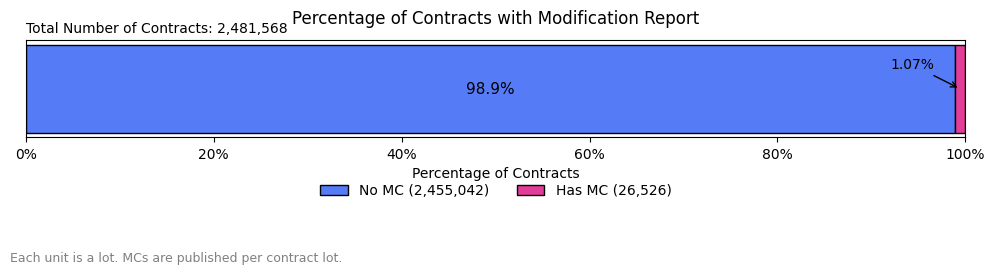

In [40]:
d = {row["has_mc"]: (row["n"], row["pct"]) for row in summary.to_dicts()}
n_yes, pct_yes = d.get(True, (0, 0.0))
n_no,  pct_no  = d.get(False, (0, 0.0))
total = n_yes + n_no

# --- plot ---
fig, ax = plt.subplots(figsize=(10, 2.6))

bars_no = ax.barh(
    [""], [pct_no],
    color="#567bf6",
    label=f"No MC ({n_no:,})",
    edgecolor="black", linewidth=1
)
bars_yes = ax.barh(
    [""], [pct_yes],
    color="#e23e99",
    left=[pct_no],
    label=f"Has MC ({n_yes:,})",
    edgecolor="black", linewidth=1
)

ax.set_xlim(0, 1)
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_yticks([])
ax.set_xlabel("Percentage of Contracts")

ax.set_title(
    "Percentage of Contracts with Modification Report",
    pad=12
)

# --- labels ---
# Big segment centered
if pct_no > 0.08:
    ax.text(pct_no / 2, 0, f"{pct_no:.1%}",
            va="center", ha="center", fontsize=11)

# Small segment: callout with arrow (prettier than squeezing text)
if pct_yes > 0:
    x_mid = pct_no + pct_yes / 2
    if pct_yes >= 0.06:
        ax.text(x_mid, 0, f"{pct_yes:.1%}",
                va="center", ha="center", fontsize=11)
    else:
        ax.annotate(
            f"{pct_yes:.2%}",
            xy=(x_mid, 0), xycoords=("data", "data"),
            xytext=(0.92, 0.75), textcoords=("axes fraction", "axes fraction"),
            arrowprops=dict(arrowstyle="->", lw=1),
            ha="left", va="center"
        )

# Total as subtitle-style text (inside axes, top-left)
ax.text(
    0.0, 1.05,
    f"Total Number of Contracts: {total:,}",
    transform=ax.transAxes,
    ha="left", va="bottom"
)

# Legend below, centered
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.35),
    ncol=2,
    frameon=False
)

fig.text(
    0.01, 0.01,
    "Each unit is a lot. MCs are published per contract lot.",
    ha="left",
    va="top",
    fontsize=9,
    color="gray"
)

plt.tight_layout()
plt.show()

## 2nd Visualization

See the evolution, thoughtout the years, of the number of contract modifications.

In [6]:
# SEGUNDA VISUALIZAÇÃO
## ver a evolução de modificações contratuais ao longo do tempo

yearly = (
    modifications
    # keep only rows that are modifications
    .filter(pl.col("Fundamentação da MC").is_not_null())
    # extract year
    .with_columns(
        pl.col("Data da Modificação").dt.year().alias("year")
    )
    # count per year
    .group_by("year")
    .agg(pl.len().alias("n_modifications"))
    .sort("year")
).drop_nulls()

yearly_pd = yearly.to_pandas()

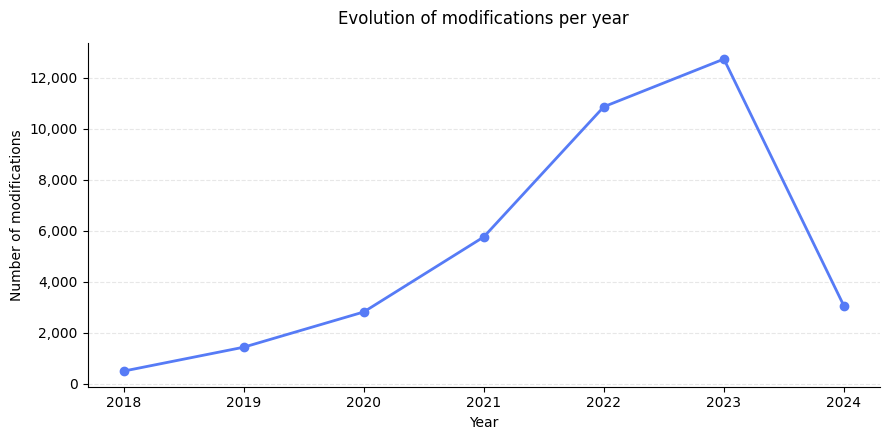

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(9, 4.5))

ax.plot(
    yearly_pd["year"],
    yearly_pd["n_modifications"],
    marker="o",
    linewidth=2,
    color="#567bf6"
)

# Labels & title
ax.set_title("Evolution of modifications per year", pad=14)
ax.set_xlabel("Year")
ax.set_ylabel("Number of modifications")

# Y-axis formatting (thousands separator)
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"{int(x):,}")
)

# Grid: light and unobtrusive (y-axis only)
ax.grid(
    True,
    which="major",
    axis="y",
    linestyle="--",
    alpha=0.3
)

# Clean look: remove top/right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Small horizontal margin
ax.margins(x=0.05)

plt.tight_layout()
plt.show()


In [8]:
monthly = (
    modifications
    .filter(pl.col("Fundamentação da MC").is_not_null())
    .with_columns(
        pl.col("Data da Modificação")
          .dt.truncate("1mo")
          .alias("month")
    )
    .group_by("month")
    .agg(pl.len().alias("n_modifications"))
    .sort("month")
)
monthly = (
    monthly
    .with_columns(pl.col("month").cast(pl.Date))
    .upsample(
        time_column="month",
        every="1mo"
    )
    .fill_null(0)
    .sort("month")
)
monthly_pd = monthly.to_pandas()


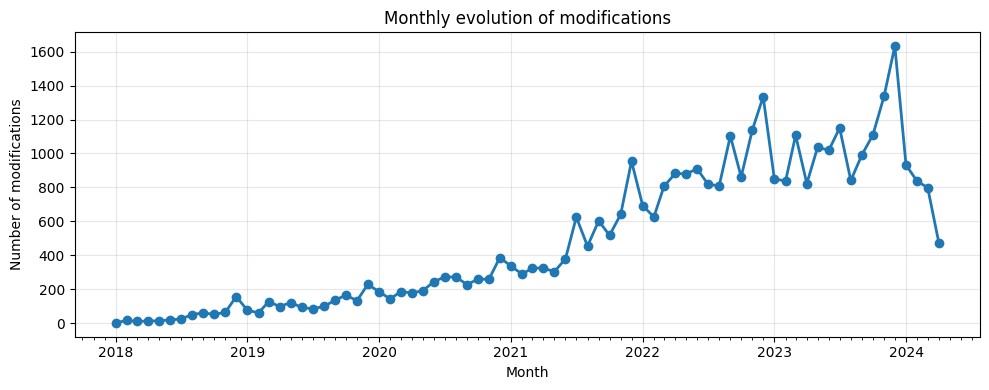

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(
    monthly_pd["month"],
    monthly_pd["n_modifications"],
    marker="o",
    linewidth=2
)

ax.set_xlabel("Month")
ax.set_ylabel("Number of modifications")
ax.set_title("Monthly evolution of modifications")

# nicer date ticks
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [10]:
monthly_seasonality = (
    modifications
    .filter(pl.col("Fundamentação da MC").is_not_null())
    .with_columns(
        pl.col("Data da Modificação").dt.month().alias("month")
    )
    .group_by("month")
    .agg(pl.len().alias("n_modifications"))
    .sort("month")
).drop_nulls()
monthly_seasonality_pd = monthly_seasonality.to_pandas()

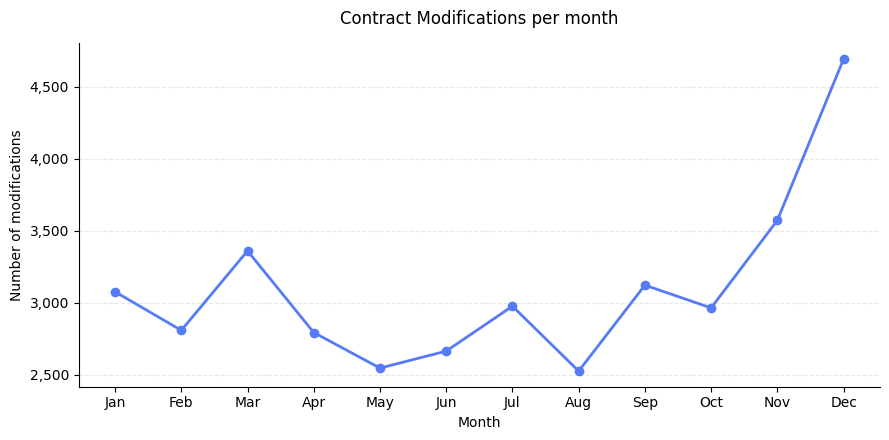

In [11]:
fig, ax = plt.subplots(figsize=(9, 4.5))

ax.plot(
    monthly_seasonality_pd["month"],
    monthly_seasonality_pd["n_modifications"],
    marker="o",
    linewidth=2,
    color="#567bf6"
)

# X-axis: months
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[m] for m in range(1, 13)])

# Labels & title
ax.set_title("Contract Modifications per month", pad=14)
ax.set_xlabel("Month")
ax.set_ylabel("Number of modifications")

# Y-axis formatting (thousands separator)
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"{int(x):,}")
)

# Grid: light and unobtrusive (y-axis only)
ax.grid(
    True,
    which="major",
    axis="y",
    linestyle="--",
    alpha=0.3
)

# Clean look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Small horizontal margin
ax.margins(x=0.05)

plt.tight_layout()
plt.show()


Outra ideia -> diferença entre a data de celebração do contrato e a data de modificação - só se tiver tempo

## 3rd Visualizatiom

See, from the contracts modified, the ones that have more than 1 modification report.

In [12]:
plot_data = modifications.group_by([
        "N.º Procedimento (ID BASE)",
        "N.º Contrato",
        "Número de Ordem do Lote",
    ]).agg(pl.col("num_mods").first()) \
    .filter(pl.col("num_mods").is_not_null())

In [13]:
counts = (
    plot_data
    .group_by("num_mods")
    .agg(pl.len().alias("n_rows"))
    .sort("num_mods")
).filter((pl.col("num_mods")>2) & (pl.col("n_rows")>10))
counts_pd = counts.to_pandas()


In [14]:
binned = (
    modifications
    .with_columns(
        pl.when(pl.col("num_mods") >= 10)
          .then(pl.lit("10 or more"))
          .otherwise(pl.col("num_mods").cast(pl.Utf8))
          .alias("num_mods_cat")
    )
    .group_by("num_mods_cat")
    .agg(pl.len().alias("n_rows"))
).drop_nulls()

order = [str(i) for i in range(1, 10)] + ["10 or more"]


binned_pd = binned.to_pandas()

binned_pd["num_mods_cat"] = pd.Categorical(
    binned_pd["num_mods_cat"],
    categories=order,
    ordered=True,
)
binned_pd = binned_pd.sort_values("num_mods_cat")


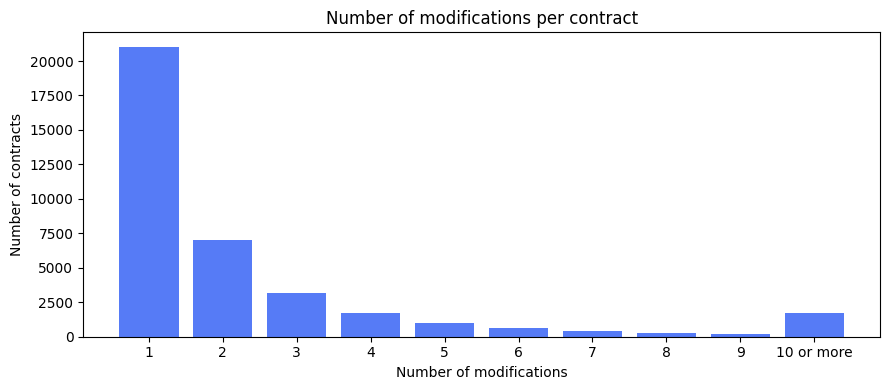

In [15]:
fig, ax = plt.subplots(figsize=(9, 4))

ax.bar(
    binned_pd["num_mods_cat"],
    binned_pd["n_rows"],
    color="#567bf6"
)

ax.set_xlabel("Number of modifications")
ax.set_ylabel("Number of contracts")
ax.set_title("Number of modifications per contract")

plt.tight_layout()
plt.show()


## 4th Visualization

Se, from the contracts with a modification, signalize the ones that have incoherences in the fundamentation.

In [16]:
# quantos contratos têm pelo menos uma fundamentação incoerente

plot_data = modifications \
    .filter(pl.col("Fundamentação da MC").is_not_null()) \
    .group_by([
        "N.º Procedimento (ID BASE)",
        "N.º Contrato",
        "Número de Ordem do Lote",
    ]) \
    .agg(
        (pl.col("indicator_fund")==1).any()
    )

summary = (
    plot_data
    .group_by("indicator_fund")
    .agg(pl.len().alias("n"))
    .with_columns(
        (pl.col("n") / pl.col("n").sum()).alias("pct")
    )
)

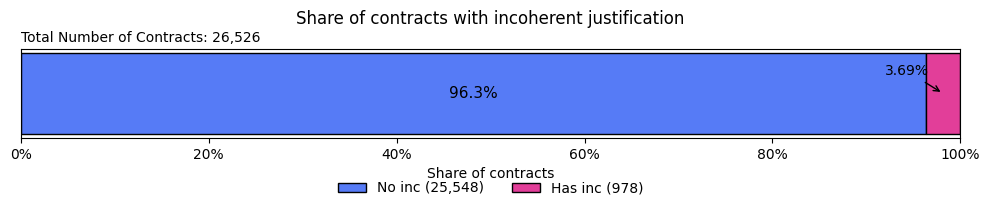

In [17]:
d = {row["indicator_fund"]: (row["n"], row["pct"]) for row in summary.to_dicts()}
n_yes, pct_yes = d.get(True, (0, 0.0))
n_no,  pct_no  = d.get(False, (0, 0.0))
total = n_yes + n_no

# --- plot ---
fig, ax = plt.subplots(figsize=(10, 2.6))

bars_no = ax.barh(
    [""], [pct_no],
    color="#567bf6",
    label=f"No inc ({n_no:,})",
    edgecolor="black", linewidth=1
)
bars_yes = ax.barh(
    [""], [pct_yes],
    color="#e23e99",
    left=[pct_no],
    label=f"Has inc ({n_yes:,})",
    edgecolor="black", linewidth=1
)

ax.set_xlim(0, 1)
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_yticks([])
ax.set_xlabel("Share of contracts")

ax.set_title(
    "Share of contracts with incoherent justification",
    pad=18
)

# --- labels ---
# Big segment centered
if pct_no > 0.08:
    ax.text(pct_no / 2, 0, f"{pct_no:.1%}",
            va="center", ha="center", fontsize=11)

# Small segment: callout with arrow (prettier than squeezing text)
if pct_yes > 0:
    x_mid = pct_no + pct_yes / 2
    if pct_yes >= 0.06:
        ax.text(x_mid, 0, f"{pct_yes:.1%}",
                va="center", ha="center", fontsize=11)
    else:
        ax.annotate(
            f"{pct_yes:.2%}",
            xy=(x_mid, 0), xycoords=("data", "data"),
            xytext=(0.92, 0.75), textcoords=("axes fraction", "axes fraction"),
            arrowprops=dict(arrowstyle="->", lw=1),
            ha="left", va="center"
        )

# Total as subtitle-style text (inside axes, top-left)
ax.text(
    0.0, 1.05,
    f"Total Number of Contracts: {total:,}",
    transform=ax.transAxes,
    ha="left", va="bottom"
)

# Legend below, centered
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.35),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()

## 5th Visualization

Contracts with more than one fundamentation

In [18]:
# QUINTA VISUALIZAÇÃO
## ver, dos contratos sinalizados o número de contratos com amis do que uma fundamentação dif.
#  Estes contratos têm obrigatoriamente de ter mais do que uma modificação contratual

In [19]:
plot_data = modifications.group_by([
        "N.º Procedimento (ID BASE)",
        "N.º Contrato",
        "Número de Ordem do Lote",
    ]).agg((pl.col("num_funds").first()),
           (pl.col("num_mods").first())) \
    .filter(pl.col("num_mods").is_not_null()) \
    .with_columns(
        pl.when(pl.col("num_funds")>1).then(pl.lit(True)).otherwise(pl.lit(False)).alias("num_funds_ind")
    ) \
    #.filter(pl.col("num_mods")>1)

In [20]:
summary = (
    plot_data
    .group_by("num_funds_ind")
    .agg(pl.len().alias("n"))
    .with_columns(
        (pl.col("n") / pl.col("n").sum()).alias("pct")
    )
)

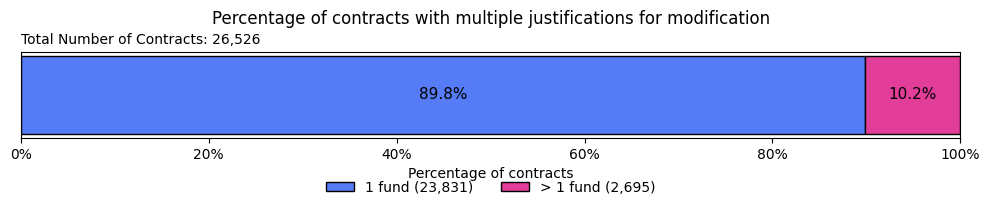

In [21]:
d = {row["num_funds_ind"]: (row["n"], row["pct"]) for row in summary.to_dicts()}
n_yes, pct_yes = d.get(True, (0, 0.0))
n_no,  pct_no  = d.get(False, (0, 0.0))
total = n_yes + n_no

# --- plot ---
fig, ax = plt.subplots(figsize=(10, 2.6))

bars_no = ax.barh(
    [""], [pct_no],
    color="#567bf6",
    label=f"1 fund ({n_no:,})",
    edgecolor="black", linewidth=1
)
bars_yes = ax.barh(
    [""], [pct_yes],
    color="#e23e99",
    left=[pct_no],
    label=f"> 1 fund ({n_yes:,})",
    edgecolor="black", linewidth=1
)

ax.set_xlim(0, 1)
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_yticks([])
ax.set_xlabel("Percentage of contracts")

ax.set_title(
    "Percentage of contracts with multiple justifications for modification",
    pad=20
)

# --- labels ---
# Big segment centered
if pct_no > 0.08:
    ax.text(pct_no / 2, 0, f"{pct_no:.1%}",
            va="center", ha="center", fontsize=11)

# Small segment: callout with arrow (prettier than squeezing text)
if pct_yes > 0:
    x_mid = pct_no + pct_yes / 2
    if pct_yes >= 0.06:
        ax.text(x_mid, 0, f"{pct_yes:.1%}",
                va="center", ha="center", fontsize=11)
    else:
        ax.annotate(
            f"{pct_yes:.2%}",
            xy=(x_mid, 0), xycoords=("data", "data"),
            xytext=(0.92, 0.75), textcoords=("axes fraction", "axes fraction"),
            arrowprops=dict(arrowstyle="->", lw=1),
            ha="left", va="center"
        )

# Total as subtitle-style text (inside axes, top-left)
ax.text(
    0.0, 1.05,
    f"Total Number of Contracts: {total:,}",
    transform=ax.transAxes,
    ha="left", va="bottom"
)

# Legend below, centered
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.35),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()

## 6th Visualization

In [33]:
diff_days = modifications.filter(pl.col("Fundamentação da MC").is_not_null()) \
.with_columns((pl.col("Data da Modificação") - pl.col("Data Celebração")).dt.total_days().alias("diff_dates")).select(["diff_dates"]).to_pandas()

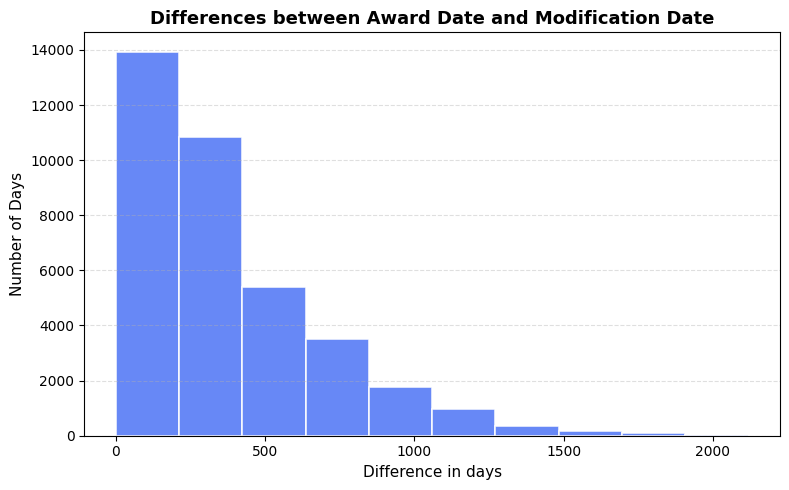

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.hist(
    diff_days,
    bins=10,
    color="#567bf6",
    edgecolor="white",
    linewidth=1.2,
    alpha=0.9
)

plt.xlabel("Difference in days", fontsize=11)
plt.ylabel("Number of Days", fontsize=11)
plt.title("Differences between Award Date and Modification Date", fontsize=13, weight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


# Visualizations for the difs in data modifications

## 1st Visualization

Percentage of contracts that have incoherent dates (previously calcualted by CV)

In [42]:
prob_dates = difs_data.with_columns(
    pl.when((pl.col("1014_a")==0) | (pl.col("1014_b")==0) | (pl.col("1023")==0)).then(pl.lit(1)).otherwise(pl.lit(0)).alias("has_prob_dates")
)

summary = prob_dates.group_by("has_prob_dates")\
    .agg(pl.len().alias("n")) \
    .with_columns(
        (pl.col("n") / pl.col("n").sum()).alias("pct")
    )

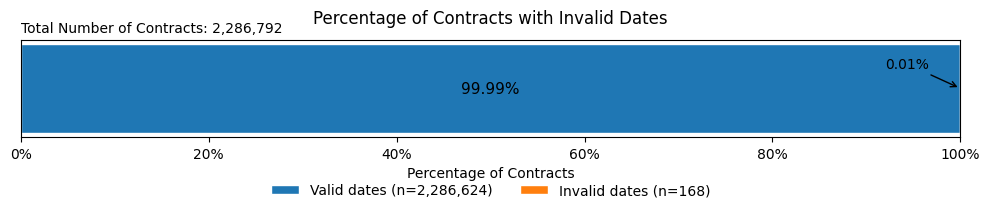

In [43]:
d = {row["has_prob_dates"]: (row["n"], row["pct"]) for row in summary.to_dicts()}
n_yes, pct_yes = d.get(True, (0, 0.0))
n_no,  pct_no  = d.get(False, (0, 0.0))
total = n_yes + n_no

# --- plot ---
fig, ax = plt.subplots(figsize=(10, 2.6))

bars_no = ax.barh(
    [""], [pct_no],
    label=f"Valid dates (n={n_no:,})",
    edgecolor="white", linewidth=1
)
bars_yes = ax.barh(
    [""], [pct_yes],
    left=[pct_no],
    label=f"Invalid dates (n={n_yes:,})",
    edgecolor="white", linewidth=1
)

ax.set_xlim(0, 1)
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_yticks([])
ax.set_xlabel("Percentage of Contracts")

ax.set_title(
    "Percentage of Contracts with Invalid Dates",
    pad=12
)

# --- labels ---
# Big segment centered
if pct_no > 0.08:
    ax.text(pct_no / 2, 0, f"{pct_no:.2%}",
            va="center", ha="center", fontsize=11)

# Small segment: callout with arrow (prettier than squeezing text)
if pct_yes > 0:
    x_mid = pct_no + pct_yes / 2
    if pct_yes >= 0.06:
        ax.text(x_mid, 0, f"{pct_yes:.2%}",
                va="center", ha="center", fontsize=11)
    else:
        ax.annotate(
            f"{pct_yes:.2%}",
            xy=(x_mid, 0), xycoords=("data", "data"),
            xytext=(0.92, 0.75), textcoords=("axes fraction", "axes fraction"),
            arrowprops=dict(arrowstyle="->", lw=1),
            ha="left", va="center"
        )

# Total as subtitle-style text (inside axes, top-left)
ax.text(
    0.0, 1.05,
    f"Total Number of Contracts: {total:,}",
    transform=ax.transAxes,
    ha="left", va="bottom"
)

# Legend below, centered
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.35),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()

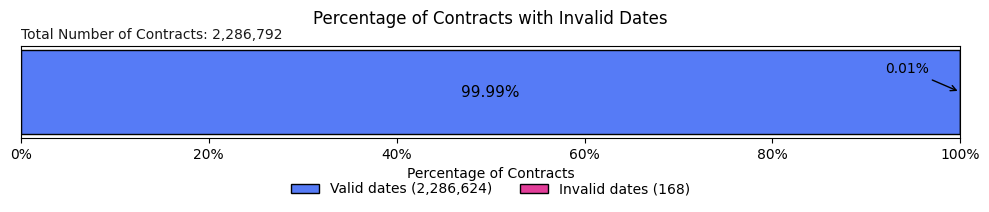

In [44]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

d = {row["has_prob_dates"]: (row["n"], row["pct"]) for row in summary.to_dicts()}
n_yes, pct_yes = d.get(True, (0, 0.0))
n_no,  pct_no  = d.get(False, (0, 0.0))
total = n_yes + n_no

fig, ax = plt.subplots(figsize=(10, 2.6))

# Bars
ax.barh(
    [""], [pct_no],
    label=f"Valid dates ({n_no:,})",
    color="#567bf6",
    edgecolor="black",
    linewidth=1
)

ax.barh(
    [""], [pct_yes],
    left=[pct_no],
    label=f"Invalid dates ({n_yes:,})",
    color="#e23e99",
    edgecolor="black",
    linewidth=1
)

# Axes
ax.set_xlim(0, 1)
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_yticks([])
ax.set_xlabel("Percentage of Contracts")

ax.set_title(
    "Percentage of Contracts with Invalid Dates",
    pad=16
)

# Labels
if pct_no > 0.08:
    ax.text(
        pct_no / 2, 0, f"{pct_no:.2%}",
        va="center", ha="center", fontsize=11, color="black"
    )

if pct_yes > 0:
    x_mid = pct_no + pct_yes / 2
    if pct_yes >= 0.06:
        ax.text(
            x_mid, 0, f"{pct_yes:.2%}",
            va="center", ha="center", fontsize=11, color="black"
        )
    else:
        ax.annotate(
            f"{pct_yes:.2%}",
            xy=(x_mid, 0),
            xycoords="data",
            xytext=(0.92, 0.75),
            textcoords="axes fraction",
            arrowprops=dict(arrowstyle="->", lw=1),
            ha="left",
            va="center",
            fontsize=10
        )

# Subtitle / context
ax.text(
    0.0, 1.05,
    f"Total Number of Contracts: {total:,}",
    transform=ax.transAxes,
    ha="left",
    va="bottom",
    fontsize=10,
    alpha=0.9
)

# Legend
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.35),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()


## 2nd Visualization

Contracts that, having an invalid date, have a valid justification for that exception.

In [46]:
sing_data = difs_data.filter((pl.col("1014_a")==0) | (pl.col("1014_b")==0) | (pl.col("1023")==0))

In [47]:
summary = sing_data.group_by("2014_23") \
                .agg(pl.len().alias("n")) \
                .with_columns(
                    (pl.col("n")/pl.col("n").sum()).alias("pct")
                )


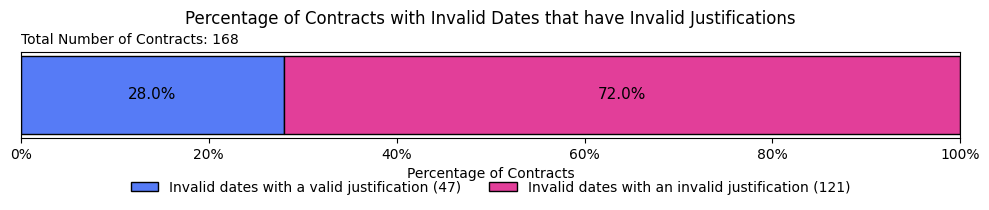

In [48]:
d = {row["2014_23"]: (row["n"], row["pct"]) for row in summary.to_dicts()}
n_yes, pct_yes = d.get(True, (0, 0.0))
n_no,  pct_no  = d.get(False, (0, 0.0))
total = n_yes + n_no

# --- plot ---
fig, ax = plt.subplots(figsize=(10, 2.6))

bars_no = ax.barh(
    [""], [pct_no],
    color="#567bf6",
    label=f"Invalid dates with a valid justification ({n_no:,})",
    edgecolor="black", linewidth=1
)
bars_yes = ax.barh(
    [""], [pct_yes],
    color="#e23e99",
    left=[pct_no],
    label=f"Invalid dates with an invalid justification ({n_yes:,})",
    edgecolor="black", linewidth=1
)

ax.set_xlim(0, 1)
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_yticks([])
ax.set_xlabel("Percentage of Contracts")

ax.set_title(
    "Percentage of Contracts with Invalid Dates that have Invalid Justifications",
    pad=20
)

# --- labels ---
# Big segment centered
if pct_no > 0.08:
    ax.text(pct_no / 2, 0, f"{pct_no:.1%}",
            va="center", ha="center", fontsize=11)

# Small segment: callout with arrow (prettier than squeezing text)
if pct_yes > 0:
    x_mid = pct_no + pct_yes / 2
    if pct_yes >= 0.06:
        ax.text(x_mid, 0, f"{pct_yes:.1%}",
                va="center", ha="center", fontsize=11)
    else:
        ax.annotate(
            f"{pct_yes:.2%}",
            xy=(x_mid, 0), xycoords=("data", "data"),
            xytext=(0.92, 0.75), textcoords=("axes fraction", "axes fraction"),
            arrowprops=dict(arrowstyle="->", lw=1),
            ha="left", va="center"
        )

# Total as subtitle-style text (inside axes, top-left)
ax.text(
    0.0, 1.05,
    f"Total Number of Contracts: {total:,}",
    transform=ax.transAxes,
    ha="left", va="bottom"
)

# Legend below, centered
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.35),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()